붓꽃 데이터셋 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


In [17]:
a = torch.tensor(3.14, requires_grad=True)
print(a)

tensor(3.1400, requires_grad=True)


In [18]:
b = torch.tensor(3.14)
b.requires_grad_(False)
print(b)


tensor(3.1400)


In [19]:
torch.manual_seed(1)
w = torch.empty(2, 3)

In [20]:
print(w)

tensor([[ 2.9841e-31,  4.1640e-41, -1.4727e+12],
        [ 3.1504e-41,  1.7862e+05,  4.1638e-41]])


In [21]:
nn.init.xavier_normal_(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)
        

In [22]:
y = np.ones(100)

In [23]:
y.shape

(100,)

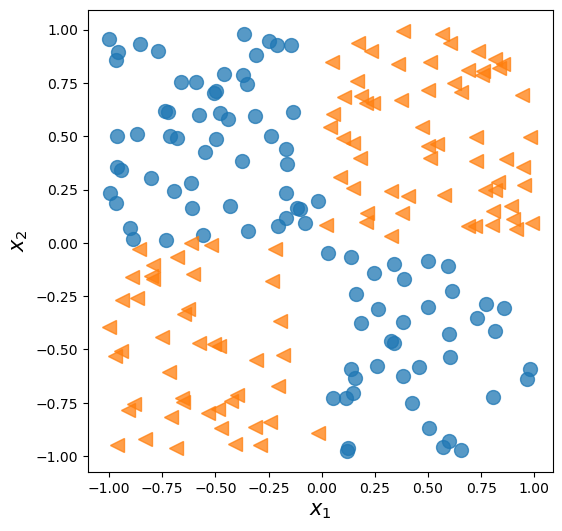

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [27]:
model1 = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [30]:
for param in model1.parameters():
    print(param)

Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True)
Parameter containing:
tensor([-0.1371], requires_grad=True)


In [29]:
for param_name, param in model1.named_parameters():
    print(f"{param_name}: {param}")

0.weight: Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True)
0.bias: Parameter containing:
tensor([-0.1371], requires_grad=True)


In [28]:
model1

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)